In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

styles = [
    "open-street-map",
    "white-bg",
    "carto-position",
    "carto-darkmatter",
    "stamen-terrain",
    "stamen-toner",
]

pd.options.display.max_columns = 9999


In [2]:
df = pd.read_csv("../data/raw/Homes_raw.csv", sep=",").iloc[:, 1:]
df["SellPrice"] = df["SellPrice"].apply(
    lambda x: x.split(",")[1]
    .replace("€", "")
    .replace(".", "")
    .split(":")[1]
    .strip()
    .replace("'", "")
)

to_drop = df[df["SellPrice"] == "Sob Consulta"]
df.drop(to_drop.index, axis=0, inplace=True)
df["SellPrice"] = df["SellPrice"].astype("Int64")


df["BusinessStatus"] = df["BusinessStatus"].apply(
    lambda x: x.split(":")[2].replace("'", "").replace("}", "").strip()
    if type(x) == str
    else x
)

df["ListingArea"] = (
    df["ListingArea"]
    .apply(lambda x: x.split("-")[1] if "-" in str(x) else x)
    .astype("float64")
    .astype("Int64")
)

df["NetArea"] = (
    df["NetArea"]
    .apply(lambda x: x.split("-")[1] if "-" in str(x) else x)
    .astype("float64")
    .astype("Int64")
)

df["Rooms"] = (
    df["Rooms"]
    .apply(lambda x: x.split("-")[1] if "-" in str(x) else x)
    .astype("float64")
    .astype("Int64")
)

df["RealEstate"] = df["RealEstate"].apply(
    lambda x: str(x).split("'")[11].split("ERA ")[1] if ":" in str(x) else x
)

df["Lng"] = (
    df["Lng"]
    .apply(lambda x: x.replace(",", ".") if "," in str(x) else x)
    .astype("float64")
)
df["Lat"] = (
    df["Lat"]
    .apply(lambda x: x.replace(",", ".") if "," in str(x) else x)
    .astype("float64")
)

df["City"] = df["Localization"].apply(lambda x: x.split(",")[-1].strip())


C:\Users\paro\AppData\Local\Temp\ipykernel_7912\2144340582.py:1: DtypeWarning: Columns (8,19,21,24,26,31,32,36,38,39,40,41,42,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/Homes_raw.csv", sep=",").iloc[:, 1:]


In [3]:
df["City"].sample(10)


4007                Aveiro
8827                 Porto
1300     Vila Nova de Gaia
4700              Santarém
664                  Braga
7197                  Faro
15620                 Faro
9175        Marinha Grande
3967                  Faro
14203                Braga
Name: City, dtype: object

In [4]:
df.head()


,DetailUrl,Gallery,BelongsToDevelopment,BusinessStatus,BusinessType,Ce,Elevator,Floor,HasExactLocation,HasVirtualTour,Highlights,Id,IsDevelopment,IsExcluded,IsFavorite,IsFreeAdProperty,IsOnline,IsSold,LandArea,Lat,ListingArea,Lng,Localization,NetArea,Owner,Parking,PropertyAdState,PropertyType,RealEstate,Reference,RentPrice,Rooms,SellPrice,SubleasePrice,Title,Wcs,LastContactInfo,FractionNumb,FloorNumb,HousingArea,ListingBuildingArea,ImplantationArea,ConstructionFeasibility,Walled,PriceNetArea,PriceListingArea,PriceLandArea,RentPriceNetArea,RentPriceListingArea,RentPriceLandArea,SubLeasePriceNetArea,SubLeasePriceListingArea,SubLeasePriceLandArea,City
0,https://www.era.pt/imovel/moradia-t4-vila-nova...,[{'Url': 'https://mediaredir2.era.pt/i/moradia...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",NaN,False,NaN,False,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1348241,False,False,False,False,True,False,735,40.890590,430,-8.535915,"Sandim, Olival, Lever e Crestuma, Porto",280,NaN,6,NaN,Moradia,Gaia Douro,174230292.0,NaN,4,450000,NaN,"Moradia T4 / Vila Nova de Gaia, Sandim, Olival...",4,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Porto
1,https://www.era.pt/imovel/apartamento-t3-amado...,[{'Url': 'https://mediaredir2.era.pt/i/apartam...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",E,False,0,False,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1348155,False,False,False,False,True,False,NaN,38.759090,90,-9.229261,"Falagueira, Amadora",80,NaN,0,NaN,Apartamento,Amadora Nascente,330230166.0,NaN,3,235000,NaN,"Apartamento T3 / Amadora, Falagueira",2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amadora
2,https://www.era.pt/imovel/moradia-isolada-t3-t...,[{'Url': 'https://mediaredir2.era.pt/i/moradia...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",B,False,NaN,True,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1347600,False,False,False,False,True,False,76,39.465263,150,-8.567995,"Brogueira, Torres Novas",125,NaN,1,NaN,Moradia Isolada,Torres Novas / Entroncamento,294230188.0,NaN,3,280000,NaN,"Moradia Isolada T3 / Torres Novas, Brogueira",2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Torres Novas
3,https://www.era.pt/imovel/apartamento-t2-novo-...,[{'Url': 'https://mediaredir2.era.pt/i/apartam...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",D,False,1,True,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1347265,False,False,False,False,True,False,NaN,38.721205,96,-9.408745,"Alcabideche, Lisboa",96,NaN,NaN,NaN,Apartamento,Estoril,347230086.0,NaN,2,540000,NaN,"Apartamento T2 / Cascais, Alcabideche",2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lisboa
4,https://www.era.pt/imovel/moradia-t3-ilhavo-il...,[{'Url': 'https://mediaredir2.era.pt/i/moradia...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",F,False,NaN,True,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1348209,False,False,False,False,True,False,NaN,40.593400,<NA>,-8.674569,"Ílhavo (São Salvador), Aveiro",94,NaN,0,NaN,Moradia,Aveiro,124230173.0,NaN,3,169900,NaN,"Moradia T3 / Ílhavo, Ílhavo (São Salvador)",5,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aveiro


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DetailUrl                 15194 non-null  object 
 1   Gallery                   15194 non-null  object 
 2   BelongsToDevelopment      15194 non-null  bool   
 3   BusinessStatus            14915 non-null  object 
 4   BusinessType              15194 non-null  object 
 5   Ce                        10987 non-null  object 
 6   Elevator                  15194 non-null  bool   
 7   Floor                     6494 non-null   object 
 8   HasExactLocation          15194 non-null  bool   
 9   HasVirtualTour            15194 non-null  bool   
 10  Highlights                10530 non-null  object 
 11  Id                        15194 non-null  int64  
 12  IsDevelopment             15194 non-null  bool   
 13  IsExcluded                15194 non-null  bool   
 14  IsFavo

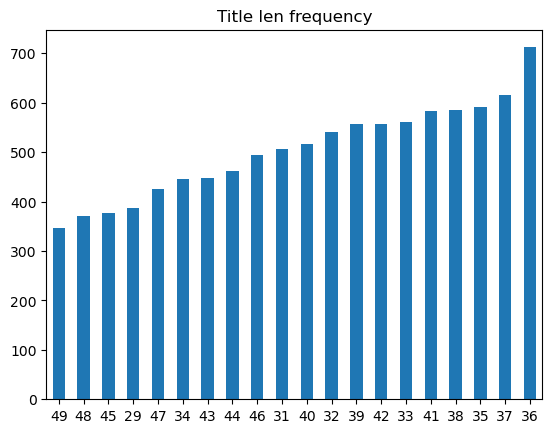

In [6]:
df["Title"].str.len().value_counts(ascending=True).tail(20).plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Title len frequency")
plt.show()


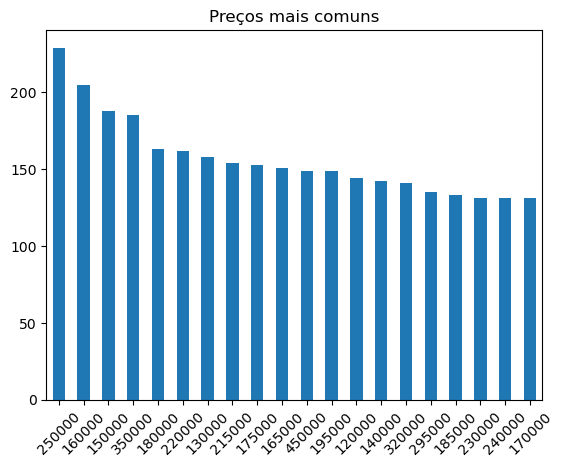

In [7]:
df["SellPrice"].value_counts().head(20).plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Preços mais comuns")
plt.show()

### Useful cols with more than 14k non null

In [8]:
feats = [
    "SellPrice",
    "City",
    "Lat",
    "Lng",
    "Localization",
    "Elevator",
    "HasExactLocation",
    "HasVirtualTour",
    "IsOnline",
    "IsSold",
    "ListingArea",
    "Walled",
    "ConstructionFeasibility",
    "Rooms",
    "PropertyType",
]


In [9]:
df[feats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SellPrice                15194 non-null  Int64  
 1   City                     15194 non-null  object 
 2   Lat                      14161 non-null  float64
 3   Lng                      14161 non-null  float64
 4   Localization             15194 non-null  object 
 5   Elevator                 15194 non-null  bool   
 6   HasExactLocation         15194 non-null  bool   
 7   HasVirtualTour           15194 non-null  bool   
 8   IsOnline                 15194 non-null  bool   
 9   IsSold                   15194 non-null  bool   
 10  ListingArea              14396 non-null  Int64  
 11  Walled                   15194 non-null  bool   
 12  ConstructionFeasibility  15194 non-null  bool   
 13  Rooms                    14307 non-null  Int64  
 14  PropertyType          

In [10]:
houses = df[feats].copy(deep=True)
# preencher as lats e longs com as medianas de cada cidade
houses["Lng"] = houses["Lng"].fillna(
    houses.groupby(["City"])["Lng"].transform("median")
)

houses["Lat"] = houses["Lat"].fillna(
    houses.groupby(["City"])["Lat"].transform("median")
)

# algumas instâncias têm erros na lat e lng
# lat e lng extraidos da mediana de outras instâncias

houses.loc[(houses["City"] == "Lisboa") & (houses["Lat"] < 30), "Lat"] = houses.groupby(
    ["City"]
).median()["Lat"]["Lisboa"]

houses.loc[(houses["City"] == "Lisboa") & (houses["Lat"] < 30), "Lng"] = houses.groupby(
    ["City"]
).median()["Lng"]["Lisboa"]

C:\Users\paro\AppData\Local\Temp\ipykernel_7912\2962480121.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).median()["Lat"]["Lisboa"]
C:\Users\paro\AppData\Local\Temp\ipykernel_7912\2962480121.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).median()["Lng"]["Lisboa"]


In [11]:
px.scatter_mapbox(houses, lat="Lat", lon="Lng",
                  mapbox_style=styles[0], color="City")


In [12]:
houses.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SellPrice                15194 non-null  Int64  
 1   City                     15194 non-null  object 
 2   Lat                      15191 non-null  float64
 3   Lng                      15191 non-null  float64
 4   Localization             15194 non-null  object 
 5   Elevator                 15194 non-null  bool   
 6   HasExactLocation         15194 non-null  bool   
 7   HasVirtualTour           15194 non-null  bool   
 8   IsOnline                 15194 non-null  bool   
 9   IsSold                   15194 non-null  bool   
 10  ListingArea              14396 non-null  Int64  
 11  Walled                   15194 non-null  bool   
 12  ConstructionFeasibility  15194 non-null  bool   
 13  Rooms                    14307 non-null  Int64  
 14  PropertyType          

Vamos fazer quick test mesmo com alguns outliers para ver a performance

## Tenho que processar:
- testar a skew de cada row numérica
- aplicar log e talvez a seguir scaling


In [26]:
houses.select_dtypes(bool)

,Elevator,HasExactLocation,HasVirtualTour,IsOnline,IsSold,Walled,ConstructionFeasibility
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,True,False,True,False,False,False
3,False,True,False,True,False,False,False
4,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...
16755,False,False,False,True,False,False,False
16757,False,False,False,True,False,False,False
16758,False,True,False,True,False,False,False
16759,False,False,False,True,False,False,False
